In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('charity_navigator_clean.csv', index_col = 0)

In [3]:
df2 = df[df['compensation_leader_compensation'].isnull() == False]
org_type_dummies = pd.get_dummies(df2.org_type)
df2 = pd.concat([df2, org_type_dummies], axis=1, join = 'outer')
df2.drop(['charity_name', 'charity_url', 
          'city', 'cn_advisory', 
          'state', 'org_type',
          'org_category', 'compensation_leader_title'], 
         axis = 1, inplace = True)
df2.head()

,accountability_score,administrative_expenses,compensation_leader_compensation,compensation_leader_expense_percent,excess_or_deficit_for_year,financial_score,fundraising_expenses,net_assets,other_revenue,overall_score,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,89.0,164590.0,53463.0,3.11,349718.0,90.56,111522,1350382,49634.0,89.75,...,0,0,0,0,0,0,1,0,0,0
1,86.0,1001560.0,73500.0,1.47,1175965.0,85.92,54613,14773920,382540.0,85.95,...,0,0,1,0,0,0,0,0,0,0
2,85.0,93957.0,85000.0,0.99,-461502.0,77.65,248833,-770370,0.0,80.96,...,0,0,0,0,0,0,0,1,0,0
3,86.0,346867.0,61220.0,0.78,1872733.0,97.50,384550,11460087,-81726.0,89.94,...,0,0,1,0,0,0,0,0,0,0
4,97.0,135195.0,74244.0,5.41,-103940.0,87.08,87436,723772,32436.0,90.62,...,0,0,0,0,0,0,0,0,1,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
X = df2[['accountability_score', 'financial_score',
         'overall_score', 'administrative_expenses',
         'excess_or_deficit_for_year', 'fundraising_expenses',
         'net_assets', 'other_revenue',
         'payments_to_affiliates', 'Animals',
         'Arts, Culture, Humanities', 'Community Development',
         'Education', 'Environment',
         'Health', 'Human Services',
         'Human and Civil Rights', 'International',
         'Religion', 'Research and Public Policy']]
y = df2['compensation_leader_compensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [6]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


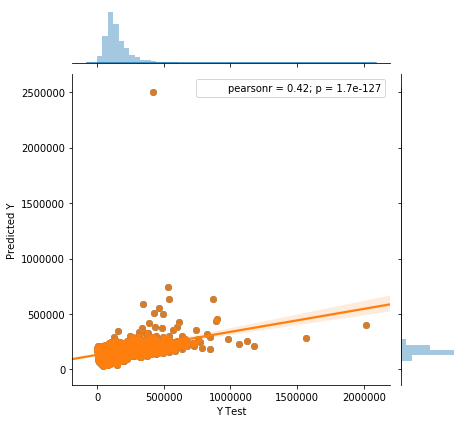

In [7]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'scatter');
ax.set_axis_labels('Y Test', 'Predicted Y')
ax.plot(sns.regplot, sns.distplot);

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


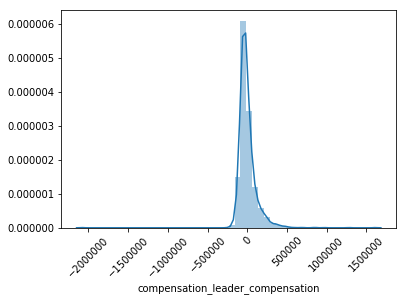

In [8]:
ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [9]:
cdf = pd.DataFrame(linreg.coef_, X.columns, columns = ['Coeficient'])
print('Intercept: \n', linreg.intercept_)
print(cdf)

Intercept: 
 -49257.38270579724
                              Coeficient
accountability_score         1826.351362
financial_score               639.494968
overall_score                -143.684141
administrative_expenses         0.005240
excess_or_deficit_for_year      0.000520
fundraising_expenses            0.000572
net_assets                      0.000006
other_revenue                   0.002446
payments_to_affiliates          0.042524
Animals                    -13465.682483
Arts, Culture, Humanities   34751.360024
Community Development      -20476.501716
Education                   13351.010698
Environment                -14727.316845
Health                      11490.032911
Human Services             -31874.542786
Human and Civil Rights       4321.197644
International               -4715.320260
Religion                   -42470.693227
Research and Public Policy  63816.456041


In [10]:
print('Train R^2:', linreg.score(X_train, y_train).round(4))
print('Test  R^2:', linreg.score(X_test, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2478
Test  R^2: 0.1754
MAE:       71913.7754
MSE:       13486831535.148
RMSE:      116132.8185


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [12]:
X = df2[['accountability_score', 'financial_score',
         'overall_score', 'administrative_expenses',
         'excess_or_deficit_for_year', 'fundraising_expenses',
         'net_assets', 'other_revenue',
         'payments_to_affiliates', 'Animals',
         'Arts, Culture, Humanities', 'Community Development',
         'Education', 'Environment',
         'Health', 'Human Services',
         'Human and Civil Rights', 'International',
         'Religion', 'Research and Public Policy']]
y = df2['compensation_leader_compensation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
df_scaled_features = pd.DataFrame(X_train_scaled, columns = X.columns)
df_scaled_features2 = pd.DataFrame(X_test_scaled, columns = X.columns)
df_scaled_features = pd.concat([df_scaled_features, df_scaled_features2], axis=1, join = 'outer')
df_scaled_features.head()

,accountability_score,financial_score,overall_score,administrative_expenses,excess_or_deficit_for_year,fundraising_expenses,net_assets,other_revenue,payments_to_affiliates,Animals,...,"Arts, Culture, Humanities",Community Development,Education,Environment,Health,Human Services,Human and Civil Rights,International,Religion,Research and Public Policy
0,0.523977,0.794084,0.977527,1.416871,0.934873,0.885268,0.290553,-0.089992,-0.075257,-0.243064,...,-0.413244,-0.325487,-0.283784,-0.235588,-0.336121,1.560762,-0.207767,-0.268927,-0.237206,-0.145763
1,0.971347,0.136413,0.490523,-0.150319,-0.210251,0.024736,-0.116007,-0.299356,-0.075257,-0.243064,...,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
2,0.971347,-0.355110,0.046528,-0.101158,-0.043167,-0.106470,-0.118849,-0.136323,-0.075257,4.114150,...,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
3,-3.166823,-2.782065,-3.394119,-0.120767,-0.111231,-0.074416,-0.147770,-0.153193,-0.075257,-0.243064,...,-0.413244,-0.325487,-0.283784,-0.235588,2.975122,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763
4,0.188450,0.008835,0.227415,0.377612,-0.450363,0.032822,0.547113,0.209070,-0.075257,-0.243064,...,2.419876,-0.325487,-0.283784,-0.235588,-0.336121,-0.640713,-0.207767,-0.268927,-0.237206,-0.145763


In [15]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 200, 225, 250, 500, 750, 1000, 10100, 10200]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r^2 training: {:.2f}, r^2 test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

alpha = 0.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.18

alpha = 1.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.18

alpha = 10.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.18

alpha = 20.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.18

alpha = 50.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.18

alpha = 100.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.18

alpha = 200.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.18

alpha = 225.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.19

alpha = 250.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.19

alpha = 500.00
num abs(coeff) > 1.0: 20, r^2 training: 0.25, r^2 test: 0.19

alpha = 750.00
num abs(coeff) > 1.0: 20, r^2 training: 0.24, r^2 test: 0.19

alpha = 1000.00
num abs(coeff) > 1.0: 20, r^2 training: 0.24, r^2 test: 0.19

alpha = 10100.00
num a

In [16]:
linridge = Ridge(alpha = 225).fit(X_train_scaled, y_train)
y_pred = linridge.predict(X_test_scaled)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


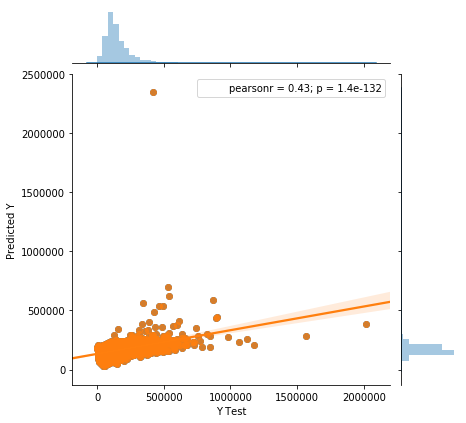

In [17]:
ax = sns.jointplot(x = y_test, y = y_pred, 
                   kind = 'scatter');
ax.set_axis_labels('Y Test', 'Predicted Y')
ax.plot(sns.regplot, sns.distplot);

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


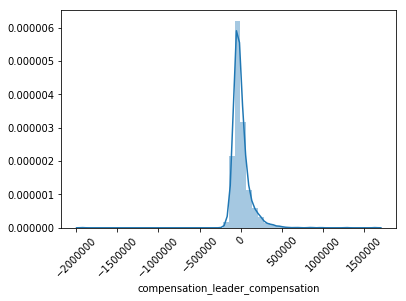

In [18]:
ax = sns.distplot((y_test - y_pred), bins = 50)
ax.xaxis.set_tick_params(which = 'both', rotation = 45)

In [19]:
cdf = pd.DataFrame(linridge.coef_, X.columns, columns = ['Coeficient'])
print('Intercept: \n', linridge.intercept_)
print(cdf)

Intercept: 
 165361.42363968908
                              Coeficient
accountability_score        12428.902548
financial_score              1756.559779
overall_score                4987.616071
administrative_expenses     30134.317939
excess_or_deficit_for_year   7019.674430
fundraising_expenses         5403.784223
net_assets                   4391.421248
other_revenue               15680.980054
payments_to_affiliates      12534.194655
Animals                     -1775.089236
Arts, Culture, Humanities   13413.346658
Community Development       -4283.238247
Education                    4614.010738
Environment                 -2041.888620
Health                       4904.126819
Human Services             -11577.217488
Human and Civil Rights       1758.692935
International                 306.293517
Religion                    -8029.700080
Research and Public Policy   9328.005212


In [20]:
print('Train R^2:', linridge.score(X_train_scaled, y_train).round(4))
print('Test  R^2:', linridge.score(X_test_scaled, y_test).round(4))
print('MAE:      ', metrics.mean_absolute_error(y_test, y_pred).round(4))
print('MSE:      ', metrics.mean_squared_error(y_test, y_pred).round(4))
print('RMSE:     ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(4))

Train R^2: 0.2473
Test  R^2: 0.1851
MAE:       71981.5551
MSE:       13328139820.4986
RMSE:      115447.5631


In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
X_F1 = df2[['accountability_score', 'financial_score',
            'overall_score', 'administrative_expenses',
            'excess_or_deficit_for_year', 'fundraising_expenses',
            'net_assets', 'other_revenue',
            'payments_to_affiliates', 'Animals',
            'Arts, Culture, Humanities', 'Community Development',
            'Education', 'Environment',
            'Health', 'Human Services',
            'Human and Civil Rights', 'International',
            'Religion', 'Research and Public Policy']]
y_F1 = df2['compensation_leader_compensation']

In [23]:
poly = PolynomialFeatures(degree = 2)
X_F1_poly = poly.fit_transform(X_F1)
X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, test_size = 0.4, random_state = 101)
linreg = Ridge().fit(X_train, y_train)

/Users/charlieyaris/.venvs/lpthw/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.2325210147094774e-21 / 1.1102230246251565e-16
  RuntimeWarning)


In [24]:
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[ 1.82270106e+03  6.34659005e+02 -1.35800357e+02  5.24083899e-03
  5.20126126e-04  5.71491759e-04  6.27425566e-06  2.44571588e-03
  4.25168790e-02 -1.33688717e+04  3.47333218e+04 -2.03859124e+04
  1.33500922e+04 -1.46229780e+04  1.15058534e+04 -3.18078173e+04
  4.33721802e+03 -4.65606051e+03 -4.22448361e+04  6.31599905e+04]
(poly deg 2 + ridge) linear model intercept (b): -49236.796
(poly deg 2 + ridge) R-squared score (training): 0.248
(poly deg 2 + ridge) R-squared score (test): 0.175
